# Machine Learning Using Linear Regression

You have been appointed as the Lead Data Analyst to build a predictive model to determine if a building will have an insurance claim during a certain period or not. You will have to predict the probability of having at least one claim over the insured period of the building.The model will be based on the building characteristics. The target variable, Claim, is a:

1 if the building has at least a claim over the insured period.

0 if the building doesn’t have a claim over the insured period.

For the analysis of this data, I'll be using Linear Regression to predict when majority of the customers will probably have at least one(1) claim.

Here, I will be analyzing the `train_data`

In [1]:
# Importing the libraries that will be used for the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
"""Displaying the variables that explains each individual column"""

var_des = pd.read_csv('../DevCareer_Task2/VariableDescription.csv')

var_des

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [6]:
#td will be the acronymn for the train_data.

""""This code will displays the train data"""

td = pd.read_csv('../DevCareer_Task2/train_data.csv')

td

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.000000,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.000000,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.000000,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.000000,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.000000,0,V,N,O,R,680.0,1,1800.0,3,1053,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,H5290,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,H5926,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,H6204,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,H6537,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0


In [8]:
"""Displaying the train_data info"""

td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [9]:
"""Displaying columns with NaN values"""

td.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [11]:
"""Replacing the NaN values with zero(0), in order not to loose some assumingly
vital information from corresponding columns"""

td.fillna(0, inplace=True)

td.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [7]:
"""Using `td.describe()` to display the count, mean, standard deviation, minimum, 25th percentile, 5oth percentile, 
75th percentile and maximum values"""

td.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


From the description of the data given above, we can see that the average of our total data for the Insured_Period is less that 1, which is `0.909758` and the average of those who have achieved at least 1 claim, is incredibly less than one, which is `0.228212`

In [13]:
"""Displaying train_data columns"""

td.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

**EDA**

Creating an EDA to check out the data

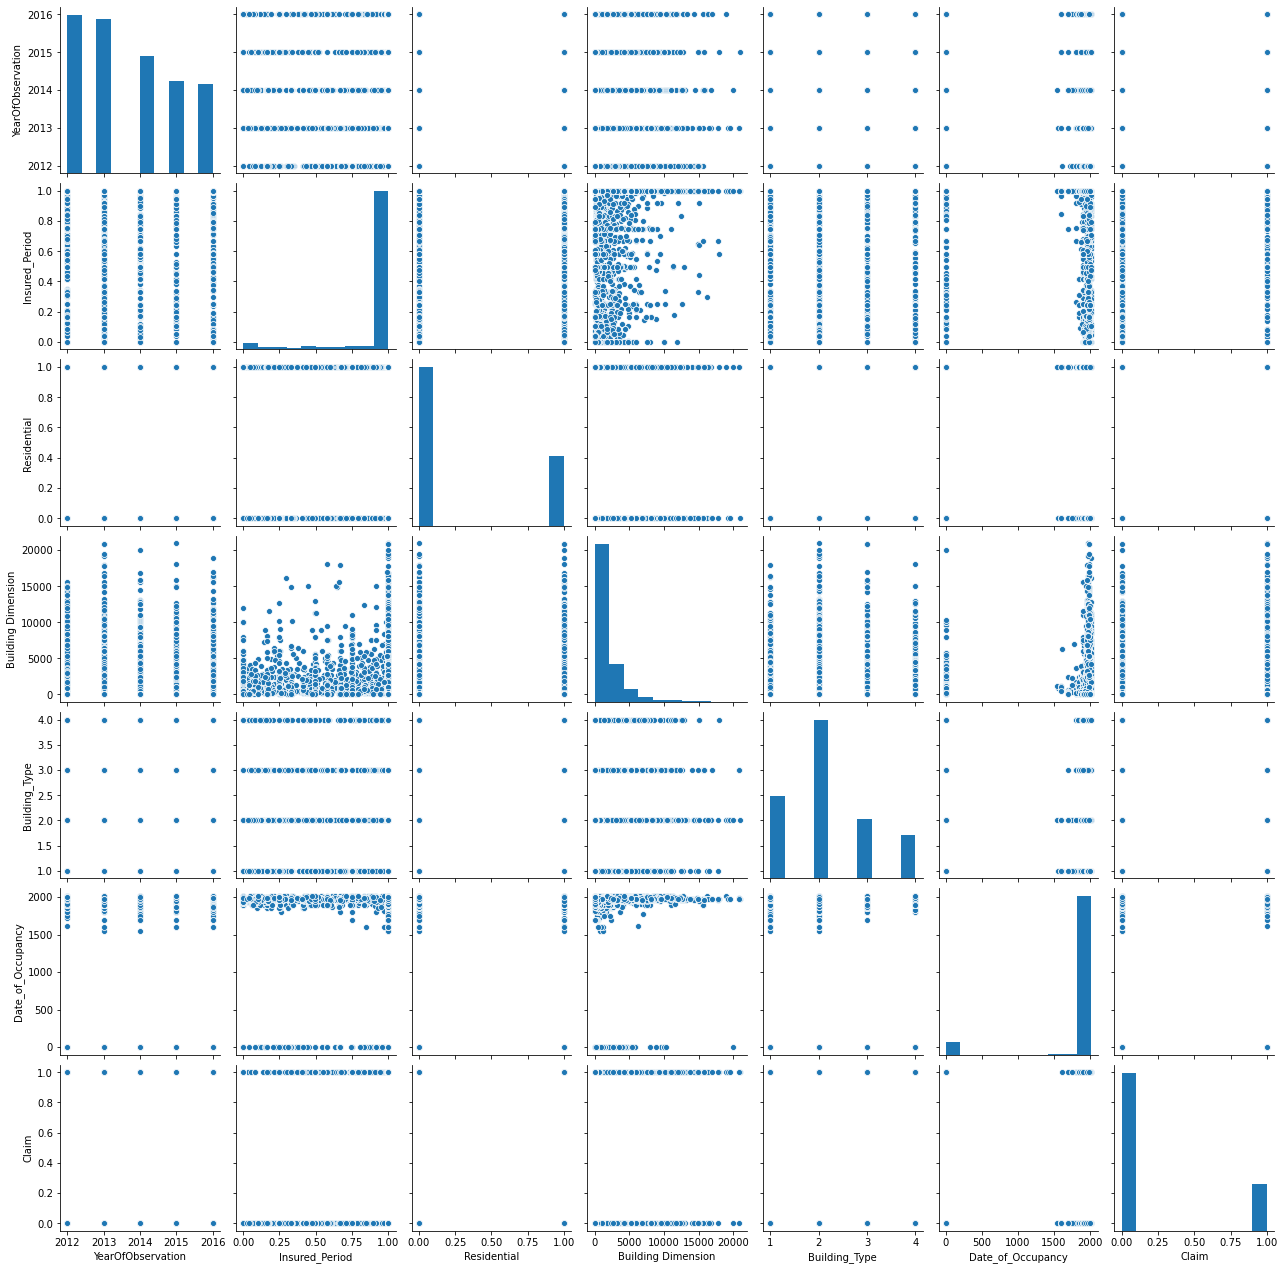

In [14]:
sns.pairplot(td)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


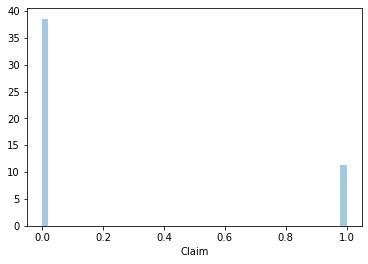

In [15]:
sns.distplot(td['Claim'])

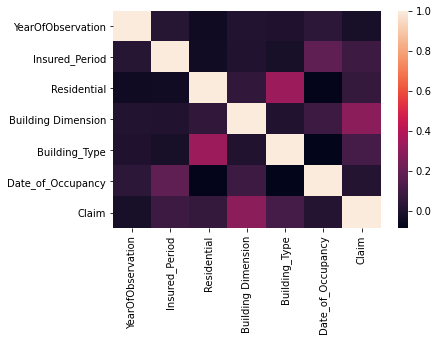

In [16]:
sns.heatmap(td.corr())

# Training a Linear Regression Model

To train our model, we'll start by creating an `X array`, which will contain the features of the train [that will be the columns which speak to the basic values for our target] and the `y array`, which will contain the target and here, that will be the `Claim` column

**X and y arrays**

In [17]:
td_features = ['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy']

X = td[td_features]

y = td.Claim

In [18]:
X.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy
count,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1855.839944,2.186034,1825.078771
std,1.383769,0.239756,0.460629,2272.645786,0.940632,505.583685
min,2012.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2012.000000,0.997268,0.000000,500.000000,2.000000,1956.750000
50%,2013.000000,1.000000,0.000000,1050.000000,2.000000,1960.000000
75%,2015.000000,1.000000,1.000000,2250.000000,3.000000,1980.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000


In [19]:
y.describe()

count    7160.000000
mean        0.228212
std         0.419709
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Claim, dtype: float64

**Creating a Train Test Split**

Let's splity the data into a training set and a testing set.
The Training Set will be used to train our model whle the Test Set will be used to evaluate the model.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

**Creating and Training the Model**

In [21]:
lin_mod = LinearRegression()

In [22]:
lin_mod.fit(X_train, y_train)

LinearRegression()

**Model Evaluation**

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [23]:
print(lin_mod.intercept_)

19.12868533178926


In [24]:
td_coeff = pd.DataFrame(lin_mod.coef_,X.columns,columns=['Coefficient'])
td_coeff

,Coefficient
YearOfObservation,-0.009562
Insured_Period,0.182828
Residential,0.014359
Building Dimension,0.000050
Building_Type,0.042797
Date_of_Occupancy,-0.000003


**Model Predictions**

Let's predict our models to see when at least one(1) claim can be achieved by customers

In [25]:
td_predictions = lin_mod.predict(X_test)

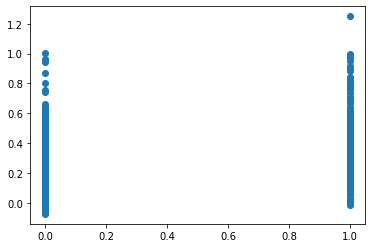

In [26]:
"""Predictions using Scatter Plots"""

plt.scatter(y_test,td_predictions)

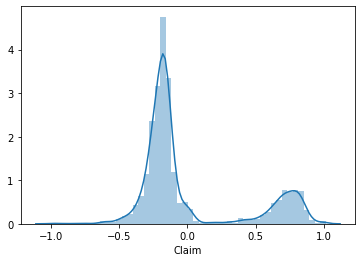

In [28]:
"""Displaying our data using Residual Histogram """

sns.distplot((y_test-td_predictions),bins=50);

From the Residual Histogram above, we can see that there is huge difference between those that have an insurance claim and those that don't. Majority of the customers have less than zero(0) claim, we can see that they are on a negative zero(0), which is really poor and a minority have at least one(1) claim.

**Regression Evaluation Metrics**

Let's do an evaluation metrics that will predict the probability of achieving some growth in having an insurance claim

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, td_predictions))
print('MSE:', metrics.mean_squared_error(y_test, td_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, td_predictions)))

MAE: 0.31545511713359586
MSE: 0.1564801302118867
RMSE: 0.3955756946677673


From the Regression evaluation Metrics, we can see that there's is a growth possibility of 15% to 39%, of customers having at least one(1) claim

# Conclusion

Based on my assumptions from the models created, I deduced that:

1. Majority of the customers of the insurance company don't have at least one(1) insurance claim
2. Our predictions show that in about one and a half years time, an average of about 15% to 39% of the customers would have achieved at least 1 insurance claim

I will explain reasons for my assumptions below:

From my first point, the question I asked myself is:
* What could be the reason why about 80% of their customers do not have at least one(1) insurance claim and only about 20% could achieve that?
* Is the insurance cost expensive in such a way that could make payments difficult?
* Could it be that the minority who have at least one(1) insurance claim are richer than the majority who have not achieved that goal?
* Does the insurance company have a means of installments spread across the insurance cost?
* Could there be a list of different insurance options that don't achieve a full insurance claim of at least one(1), but provide other beneficial areas to the customers?
* Are some of the customer still alive or not?
* Did some customers stop paying their insurance fees at some point?
* Do some customers still have the building to their name or has it been sold out?

These questions generated could create a better understanding of why most people have not achieved at least one(1) insurance claim and if the insurance company could provide answers to these questions and some level of accurate data supporting them, better predictions could be achieved.


From my second point, my assumption was based on:

* The `Regression Evaluation Metrics`. Using the predictions of the scatter plot, I assumed that in about a year and half(1 year, 6 months (from the y-axis)) the insurance compny will realize an increase or progress of about 15% to 39% of their customers who would achieve at least a claim.